<a href="https://colab.research.google.com/github/iannstronaut/PCVK_Ganjil_24-25/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum

##Import Library dan Sambungkan ke GDrive

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## Membuat Penerimaan Input Dari User

In [ ]:
try:
  brightness = int(input('Masukkan nilai kecerahan : '))

except ValueError:
  print('Error, not a number')

Masukkan nilai kecerahan : 50


## Mengolah Citra Sesuai Input dari User

Mengubah tingkat kecerahan citra
--------------------------------


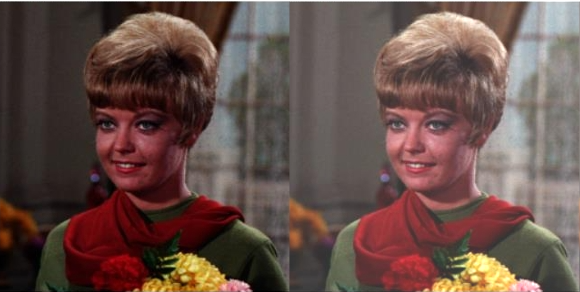

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

original= cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Tiffany.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

# Tugas

## 1 Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure

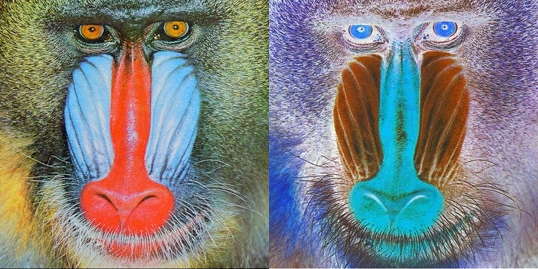

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Mandill.tiff')
inverse_citra = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      inverse_citra[y,x,c] = np.clip(255 - img[y,x,c] , 0, 255)

final_frame = cv.hconcat((img,inverse_citra))
cv2_imshow(final_frame)


## 2  Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 60
Masukkan nilai kontras : 1.5


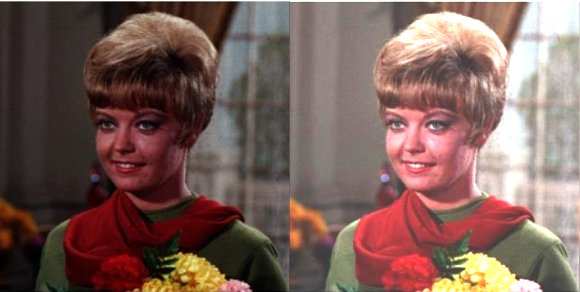

In [ ]:
print('Mengubah Tingkat Kecerahan Citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan Nilai Kecerahan : '))
  contrast = float(input('Masukkan Nilai Kontras : '))

except ValueError:
  print('Input Salah')

pic = original.copy()
brightness_image = np.zeros(pic.shape, pic.dtype)

for y in range(pic.shape[0]):
  for x in range(pic.shape[1]):
    for c in range(pic.shape[2]):
      brightness_image[y,x,c] = np.clip( contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

## 3 Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:

Mengubah tingkat kecerahan citra dengan trasnformasi log
--------------------------------
Masukkan nilai kecerahan : 40


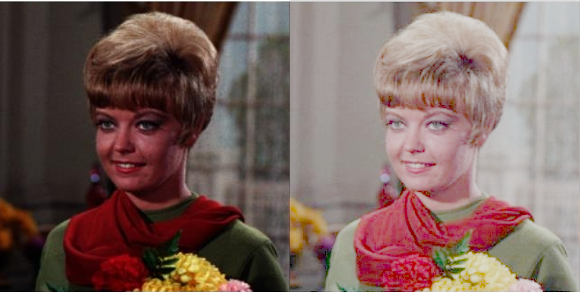

In [ ]:
import math
print('Mengubah Tingkat Kecerahan Citra Dengan Trasnformasi Log')
print('--------------------------------')

try:
  brightness = int(input('Masukkan Nilai Kecerahan : '))

except ValueError:
  print('Input Salah')

pic2 = original.copy()
brightness_image = np.zeros(pic2.shape, pic2.dtype)

for y in range(pic2.shape[0]):
  for x in range(pic2.shape[1]):
    for c in range(pic2.shape[2]):
      brightness_image[y,x,c] = np.clip( brightness * math.log((1 + pic2[y,x,c])), 0, 255)

final_frame = cv.hconcat((pic2,brightness_image))
cv2_imshow(final_frame)

## 4 Implement grayscale transformation using the averaging, lightness, and luminance method

###Avaraging

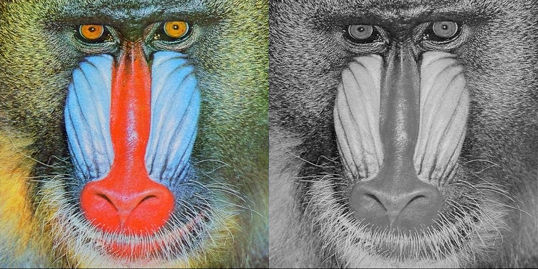

In [5]:
imgAvrg = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Mandill.tiff')
AvrgBrgthImg = np.zeros(imgAvrg.shape, imgAvrg.dtype)

for y in range(imgAvrg.shape[0]):
  for x in range(imgAvrg.shape[1]):
      AvrgBrgthImg[y,x] = np.clip(np.mean(imgAvrg[y,x]), 0, 255)

finalAvrgImg = cv.hconcat((imgAvrg,AvrgBrgthImg))
cv2_imshow(finalAvrgImg)

###Lightness

<ipython-input-7-b17c70acbb01>:9: RuntimeWarning: overflow encountered in scalar add
  LghtBrgthImg[y,x] = np.clip((max(r,g,b) + min(r,g,b))/2, 0, 255)


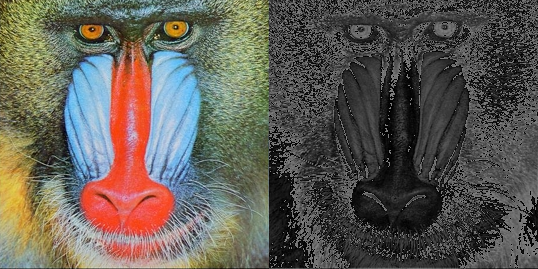

In [7]:
imgLght = imgAvrg.copy()
LghtBrgthImg = np.zeros(imgLght.shape, imgLght.dtype)

for y in range(imgLght.shape[0]):
  for x in range(imgLght.shape[1]):
    r = imgLght[y, x, 0]
    g = imgLght[y, x, 1]
    b = imgLght[y, x, 2]
    LghtBrgthImg[y,x] = np.clip((max(r,g,b) + min(r,g,b))/2, 0, 255)

finalLgthImg = cv.hconcat((imgLght,LghtBrgthImg))
cv2_imshow(finalLgthImg)

###Luminance

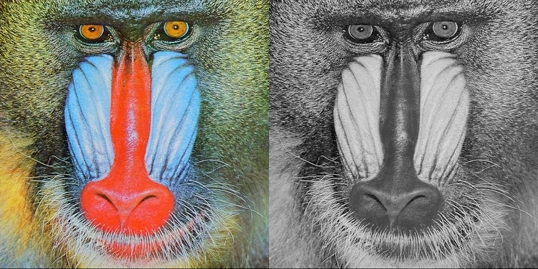

In [8]:
imgLmn = imgAvrg.copy()
LmnBrgthImg = np.zeros(imgLmn.shape, imgLmn.dtype)

for y in range(imgLmn.shape[0]):
  for x in range(imgLmn.shape[1]):
      r=imgLmn[y,x,0]
      g=imgLmn[y,x,1]
      b=imgLmn[y,x,2]
      LmnBrgthImg[y,x] = np.clip((0.21*r)+(0.72*g)+(0.07*b), 0, 255)

finalLmnImg = cv.hconcat((imgLmn,LmnBrgthImg))
cv2_imshow(finalLmnImg)

## 5 Show Certain Color in Image, and Change Other Color to Grayscale

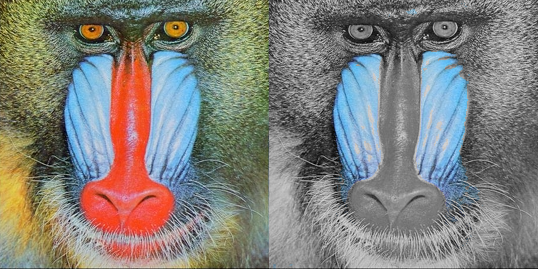

In [12]:
img5 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Mandill.tiff')

hsv = cv.cvtColor(img5, cv.COLOR_BGR2HSV)

lowB = np.array([100,50,50])
upB = np.array([130,255,255])

bMask = cv.inRange(hsv, lowB, upB)

res = cv.bitwise_and(img5, img5, mask = bMask)

gImg = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

gray_bgr = cv.cvtColor(gImg, cv.COLOR_GRAY2BGR)

imgBnG = np.where(res != 0, res, gray_bgr)

finalImg = cv.hconcat((img5, imgBnG))

cv2_imshow(finalImg)